In [3]:
import cv2 as cv
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
from PIL import Image


In [22]:
def binary(path):
    img = cv.imread(path,cv.IMREAD_GRAYSCALE)
    img = cv.resize(img,None,fx=3,fy=3,interpolation = cv.INTER_CUBIC)
    ret,thresh1 = cv.threshold(img,60,255,cv.THRESH_BINARY)
    ret,thresh2 = cv.threshold(img,90,255,cv.THRESH_BINARY_INV)
    ret,thresh3 = cv.threshold(img,100,255,cv.THRESH_TRUNC)
    ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
    ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

    kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
    # thresh2 = cv.morphologyEx(thresh2, cv.MORPH_CLOSE, kernel)#闭操作
    
    thresh2 = cv.erode(thresh2,kernel)

    titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
    for i in range(6):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()
    cv.imwrite('./resource/3-part-inv.png',thresh2)
    print(pytesseract.image_to_string(thresh2,lang='eng',config='--psm 6 -c tessedit_char_whitelist=0123456789.'))
    # print(pytesseract.image_to_string(thresh2,lang='chi_sim',config='--psm 6'))


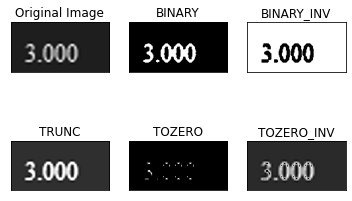

3.000



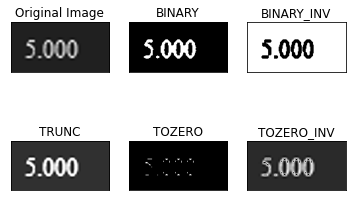

5.000



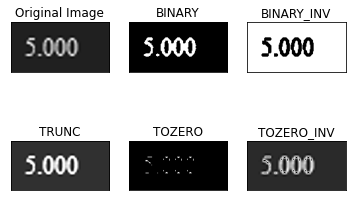

5.000



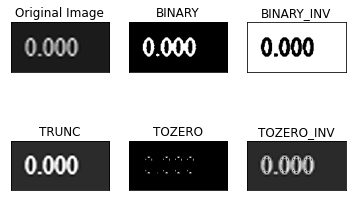

0.000



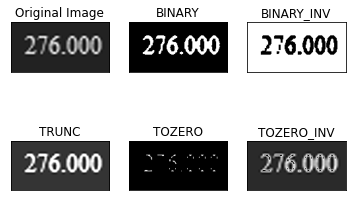

276.000



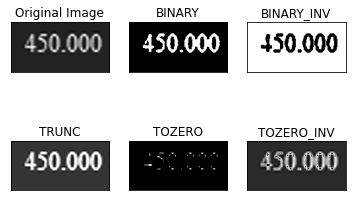

450.000



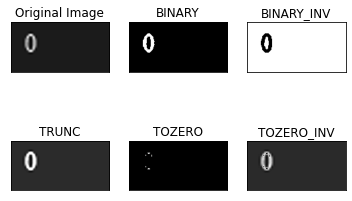

0



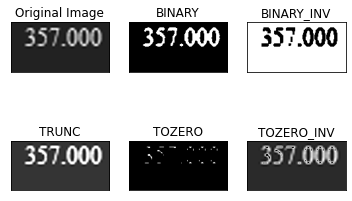

357.000



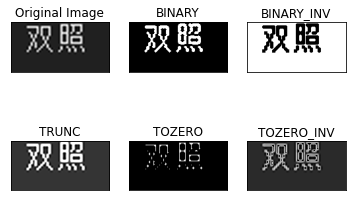

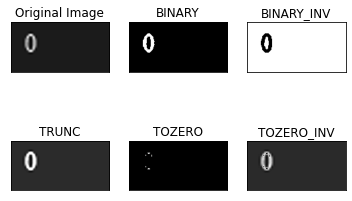

0



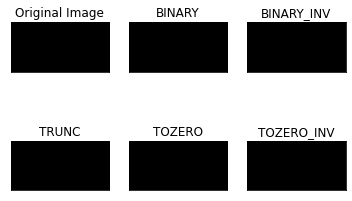

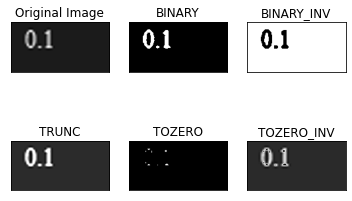

0.1



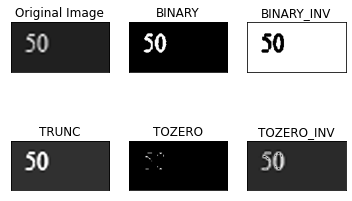

50



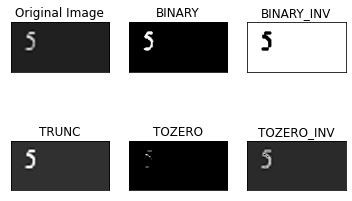

5



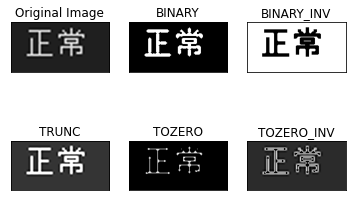

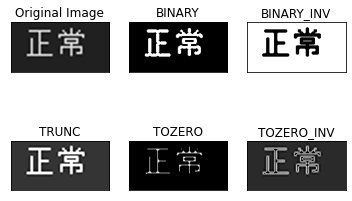

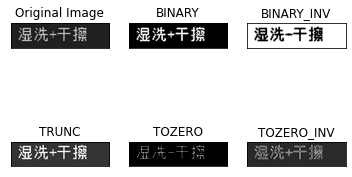

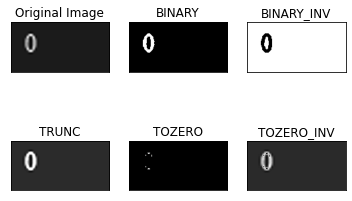

0



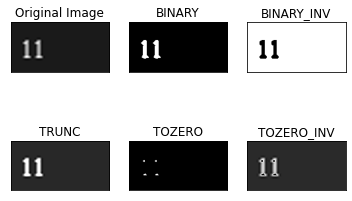

11



In [23]:
for i in range(19):
    group_id = 3
    path = f'resource/group{group_id}/{i+1}-part.png'
    binary(path)

In [ ]:
for i in range(5):
    group_id = 2
    path = f'resource/group{group_id}/{i+1}-part.png'
    binary(path)

In [ ]:
img = cv.imread(img_path,0)
img = cv.medianBlur(img,1)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()